### Vamshi Krishna Meriga

# ISM 5136 - Data Analytics and Mining for Business

## Lab Session: Data Wrangling with Pandas

### Overview:
This lab covers operations related to reading and manipulating data with Pandas.

### Task:
The code cells in this notebook have been left blank. Your task is to complete these cells and provide the execution results. The corresponding question text for each code cell is provided above the cell. Once you have completed the lab, you should publish your notebook code (the code in the .ipynb file) as a "Secret Gist" on your GitHub repository and obtain the Gist ID.

### Submission Format:
There are two deliverables of this lab: 1) the Gist ID and 2) the completed .ipynb file. Both of these should be submitted on Canvas using the corresponding lab submission link by the due date indicated on Canvas.

### Important: Do <u>not</u> forget to run the cells before submitting your work.


### Data Description:

There are two datasets for this lab. The 1st dataset (census2000_v2.txt) provides geographic, demographics, and economic information about the locations in the U.S. based on the Census conducted in 2000. Each object corresponds to one zip code within the U.S. The 2nd dataset (US_areaNames.txt) provides a list of zip codes within the U.S., along with the city, county, and state names.

### Questions: Please note that there are multiple steps in each question. You can run each step individually (before moving on to the next one) to make sure that your results are correct.

#### 1. Data Import
* Import the census2000_v2.txt data into a DataFrame named df1.
* Display the column names.
* Display the size (how many rows and columns).
* Display the first 10 rows.

In [2]:
import pandas as pd
df = pd.read_csv(r'C:\Users\VamshiKrishna\Downloads\census2000_v2.txt',delimiter='\t')

In [4]:
df.iloc[:0,:]

,RegionID,Longitude,Latitude,RegionDensityPercentile,RegionPopulation,MedianHouseholdIncome,AverageHouseholdSize


In [3]:
df.shape

(33190, 7)

In [5]:
df.iloc[:10,:]

,RegionID,Longitude,Latitude,RegionDensityPercentile,RegionPopulation,MedianHouseholdIncome,AverageHouseholdSize
0,601,-66.74947,18.180103,70.0,19143,9888.0,3.24
1,602,-67.18025,18.363285,83.0,42042,11384.0,3.10
2,603,-67.13422,18.448619,86.0,55592,10748.0,2.84
3,604,-67.13700,18.498987,83.0,3844,31199.0,3.00
4,606,-66.95881,18.182151,65.0,6449,9243.0,3.20
5,610,-67.13605,18.288319,79.0,28005,12629.0,3.01
6,612,-66.69880,18.449732,81.0,72865,13000.0,2.84
7,616,-66.67669,18.426748,78.0,10525,10476.0,2.97
8,617,-66.55576,18.455499,81.0,23223,11511.0,2.97
9,622,-67.16746,18.003125,69.0,8284,13634.0,2.64


#### 2. Data Checking
* Obtain the data types of columns in df1.
* Display summary statistics for all variables.
* Write down the problems you identify in the data (use comments to write them down in the code cell below).
* Double check the existence of missing values using a method.

##### Hints:
1. <span style="color: black; background: black; span:hover { color: white}">Possible attributes and methods to use: dtypes, describe(include='all'), isnull().sum()</span>
2. <span style="color: black; background: black; span:hover { color: white}">Problems that you should have noticed: 1) duplicates in regionID, 2) regionID is non-numeric, 3) missing values </span>

In [6]:
df.dtypes

RegionID                    object
Longitude                  float64
Latitude                   float64
RegionDensityPercentile    float64
RegionPopulation             int64
MedianHouseholdIncome      float64
AverageHouseholdSize       float64
dtype: object

In [7]:
df.describe()

,Longitude,Latitude,RegionDensityPercentile,RegionPopulation,MedianHouseholdIncome,AverageHouseholdSize
count,33190.000000,33190.000000,32177.000000,33190.000000,33173.000000,33190.000000
mean,-91.077664,38.831628,50.504149,8597.913980,38251.266783,2.500703
std,15.072058,5.358824,28.863921,12978.511224,17469.495624,0.595654
min,-176.636760,17.962234,1.000000,0.000000,0.000000,0.000000
25%,-97.218277,35.384861,26.000000,656.000000,28906.000000,2.360000
50%,-88.304135,39.462072,51.000000,2515.000000,35765.000000,2.550000
75%,-80.372860,42.109246,76.000000,11171.750000,45240.000000,2.740000
max,-65.292580,71.299525,100.000000,144024.000000,200001.000000,8.490000


In [ ]:
#There are several missing values in the column RegionDensityPercentile
#Discrepancy of MedianHouseholdIncome between min and max values is high

In [8]:
df.isnull().sum()

RegionID                      0
Longitude                     0
Latitude                      0
RegionDensityPercentile    1013
RegionPopulation              0
MedianHouseholdIncome        17
AverageHouseholdSize          0
dtype: int64

#### 3. Data Cleaning
* Remove observations with duplicated RegionID (keep one, remove rest).
* Remove observations with non-numeric RegionID values (RegionID is the zip code, which should have been numeric. A non-numeric value indicates a problem with the entry).
* Handle missing values in two different ways:
<ol>
<li>Remove observations with missing values in RegionDensityPercentile.</li>
<li>Impute missing values in the MedianHouseholdIncome columns with the average of MedianHouseholdIncome.</li>
</ol>
* After the steps above have been completed, display the summary statistics one more time.

##### Hints:
1. <span style="color: black; background: black; span:hover { color: white}">Possible methods to use: drop_duplicates(), isnumeric(), dropna(), fillna(), mean()</span>
2. <span style="color: black; background: black; span:hover { color: white}">You can use "inplace=True" parameter inside most method inputs to overwrite the existing dataframe</span>
3. <span style="color: black; background: black; span:hover { color: white}">One way of imputing missing values: df1['MedianHouseholdIncome'].fillna(df1['MedianHouseholdIncome'].mean(),inplace=True) </span>


In [10]:
df1=df.drop_duplicates('RegionID')
print(df1.shape)
df1[df1.RegionID.str.isnumeric()]
print(df1.shape)
df1.dropna(subset=['RegionDensityPercentile'],inplace=True)
print(df1.shape)
df1['MedianHouseholdIncome'].fillna(value=df['MedianHouseholdIncome'].mean(),inplace=True)
print(df1.isnull().sum())
df1.describe()

(33178, 7)
(33178, 7)
(32165, 7)
RegionID                   0
Longitude                  0
Latitude                   0
RegionDensityPercentile    0
RegionPopulation           0
MedianHouseholdIncome      0
AverageHouseholdSize       0
dtype: int64


C:\Users\VenkatBhaskar\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\VenkatBhaskar\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Longitude,Latitude,RegionDensityPercentile,RegionPopulation,MedianHouseholdIncome,AverageHouseholdSize
count,32165.000000,32165.000000,32165.000000,32165.000000,32165.000000,32165.000000
mean,-91.103296,38.847016,50.500016,8867.729395,39453.967636,2.579467
std,15.062293,5.358272,28.865519,13090.163585,16346.076666,0.403652
min,-176.636760,17.964529,1.000000,1.000000,0.000000,0.000000
25%,-97.223360,35.397259,26.000000,755.000000,29634.000000,2.380000
50%,-88.348150,39.473451,51.000000,2720.000000,36157.000000,2.560000
75%,-80.412220,42.114646,75.000000,11714.000000,45636.000000,2.750000
max,-65.292580,71.299525,100.000000,144024.000000,200001.000000,8.490000


#### 4. 2nd Dataset Import
* Try importing the US_areaNames.txt data into a DataFrame named df2. You should notice a problem.
* The issue is that the column names are missing from this dataset. Below are the names and short descriptions of columns obtained from the source repository.
* Re-import the data using column names given below.
* Display the column names.
* Display the size (how many rows and columns).
* Obtain summary statistics
* Display the first 10 rows.

##### Hints:
1. <span style="color: black; background: black; span:hover { color: white}">To import data with column names, first create a list of column names and then use the "names" parameter within the read method and point it to the list.</span>


##### Data Description:
country code      : iso country code, 2 characters <br>
postal code       : varchar(20) <br>
place name        : varchar(180) <br>
admin name1       : 1. order subdivision (state) varchar(100) <br>
admin code1       : 1. order subdivision (state) varchar(20) <br>
admin name2       : 2. order subdivision (county/province) varchar(100) <br>
admin code2       : 2. order subdivision (county/province) varchar(20) <br>
admin name3       : 3. order subdivision (community) varchar(100) <br>
admin code3       : 3. order subdivision (community) varchar(20) <br>
latitude          : estimated latitude (wgs84) <br>
longitude         : estimated longitude (wgs84) <br>
accuracy          : accuracy of lat/lng from 1=estimated to 6=centroid

In [12]:
df2 = pd.read_csv(r'C:\Users\VamshiKrishna\Downloads\US_areaNames.txt',delimiter='\t')
df2.columns=["Country Code","Postal Code","Place name","Admin Name1","Admin Code1","Admin Name2","Admin Code2","Admin Name3","Admin Code3","Latitude","Longitude","Accuracy"]

In [13]:
df2.iloc[:0,:]

,Country Code,Postal Code,Place name,Admin Name1,Admin Code1,Admin Name2,Admin Code2,Admin Name3,Admin Code3,Latitude,Longitude,Accuracy


In [14]:
df2.shape

(43627, 12)

In [15]:
df2.describe()

,Postal Code,Admin Code2,Admin Name3,Admin Code3,Latitude,Longitude,Accuracy
count,43627.000000,43623.000000,0.0,0.0,43627.000000,43627.000000,172.000000
mean,49617.691292,86.363203,NaN,NaN,38.566970,-90.991981,5.005814
std,27764.242381,92.843021,NaN,NaN,5.225958,15.668928,0.076249
min,210.000000,1.000000,NaN,NaN,7.112800,-176.658100,5.000000
25%,26284.000000,27.000000,NaN,NaN,35.051600,-97.280800,5.000000
50%,48663.000000,67.000000,NaN,NaN,39.085300,-87.826300,5.000000
75%,72845.500000,113.000000,NaN,NaN,41.864400,-80.172650,5.000000
max,99950.000000,840.000000,NaN,NaN,71.234600,171.237000,6.000000


In [16]:
df2.iloc[:10,:]

,Country Code,Postal Code,Place name,Admin Name1,Admin Code1,Admin Name2,Admin Code2,Admin Name3,Admin Code3,Latitude,Longitude,Accuracy
0,US,34034,APO,NaN,AA,Dillon,33.0,NaN,NaN,33.0364,-82.2493,NaN
1,US,99553,Akutan,Alaska,AK,Aleutians East,13.0,NaN,NaN,54.1430,-165.7854,NaN
2,US,99571,Cold Bay,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.3976,-162.4206,NaN
3,US,99583,False Pass,Alaska,AK,Aleutians East,13.0,NaN,NaN,54.8410,-163.4368,NaN
4,US,99612,King Cove,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.0628,-162.3056,NaN
5,US,99661,Sand Point,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.3192,-160.4914,NaN
6,US,99546,Adak,Alaska,AK,Aleutians West (CA),16.0,NaN,NaN,51.8800,-176.6581,NaN
7,US,99547,Atka,Alaska,AK,Aleutians West (CA),16.0,NaN,NaN,52.1224,-174.4301,NaN
8,US,99591,Saint George Island,Alaska,AK,Aleutians West (CA),16.0,NaN,NaN,56.5944,-169.6186,NaN
9,US,99638,Nikolski,Alaska,AK,Aleutians West (CA),16.0,NaN,NaN,52.9883,-168.7884,NaN


#### 5. 2nd Dataset Cleaning
* We only need the zip code, city, and state abbreviation from the 2nd dataset. Therefore, subset these 3 columns into a new dataset called df3.
* Rename "place name" to "city" and "admin code1" to "state" in df3. 
* After these steps, display the column names in df3.

In [17]:
df3=df2[["Postal Code","Place name","Admin Code1"]].copy()
df3.rename(columns={"Place name":"city","Admin Code1":"state"},inplace=True)
df3.iloc[:0,:]

,Postal Code,city,state


In [18]:
df3.shape

(43627, 3)

#### 6. Data Merging
* Try merging the census (df1) and location (df3) dataframes into a new dataframe called dfMerged. You can use the pandas' merge function for this purpose.
* You will encounter a data type related error when trying to merge. Explain this error using comments.
* Fix this error and complete the merging process.
* After the merging, obtain the summary statistics for dfMerged.

##### Hints:
1. <span style="color: black; background: black; span:hover { color: white}">You can look up pandas' merge documentation to understand more about the parameters used for merging datasets. An important thing to note is the merging should be based on the zip code value, however the zip code is called differently in the two datasets (RegionID in df1 and postal code in df3). Therefore, you need to use left_on and right_on parameters.</span>
2. <span style="color: black; background: black; span:hover { color: white}">The problem when trying to merge is that data types of zip code do not match -- one is numeric, the other one is string. To fix this, you can convert the RegionID in df1 to numeric using the to_numeric() function.</span>


In [19]:
dfMerged=df1.merge(df3)

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [20]:
"""There should be a common column on which the join operation should happen.
Generally, Both the dataframes should have a common column to merge on,
But in this cases there are no common columns. So we merge on the indexes"""

'There should be a common column on which the join operation should happen.\nGenerally, Both the dataframes should have a common column to merge on,\nBut in this cases there are no common columns. So we merge on the indexes'

In [21]:
dfMerged=df1.merge(df3,left_index=True,right_index=True)
dfMerged.describe()

,Longitude,Latitude,RegionDensityPercentile,RegionPopulation,MedianHouseholdIncome,AverageHouseholdSize,Postal Code
count,32165.000000,32165.000000,32165.000000,32165.000000,32165.000000,32165.000000,32165.000000
mean,-91.103296,38.847016,50.500016,8867.729395,39453.967636,2.579467,49170.505363
std,15.062293,5.358272,28.865519,13090.163585,16346.076666,0.403652,27636.216200
min,-176.636760,17.964529,1.000000,1.000000,0.000000,0.000000,210.000000
25%,-97.223360,35.397259,26.000000,755.000000,29634.000000,2.380000,28408.000000
50%,-88.348150,39.473451,51.000000,2720.000000,36157.000000,2.560000,48299.000000
75%,-80.412220,42.114646,75.000000,11714.000000,45636.000000,2.750000,69190.000000
max,-65.292580,71.299525,100.000000,144024.000000,200001.000000,8.490000,99929.000000


#### 7. Preliminary Analysis (City Level)
* Let's assume that we'd like to investigate the census results for Tallahassee.
* Subset Tallahassee observations from the dfMerged data into a new dataframe called dfTally. To do this, you need to use "Tallahassee" as the city name, but not the zip codes (i.e., no hard coding of zip codes).
* Sort the dfTally dataset by MedianHouseholdIncome and write it over the sorted data into the dfTally dataframe. Which zip code has the highest median income in Tallahassee?

In [22]:
# Enter your answer to the question above in this cell.
dfTally=dfMerged[dfMerged['city']=='Tallahassee']
dfTally.sort_values(by=['MedianHouseholdIncome'],ascending=False,inplace=True)
dfTally

C:\Users\VenkatBhaskar\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,RegionID,Longitude,Latitude,RegionDensityPercentile,RegionPopulation,MedianHouseholdIncome,AverageHouseholdSize,Postal Code,city,state
7486,24849,-81.57310,37.666079,47.0,420,37321.0,2.94,32311,Tallahassee,FL
7476,24830,-81.54320,37.319439,40.0,210,35625.0,2.08,32302,Tallahassee,FL
7491,24854,-81.53722,37.741813,39.0,986,32650.0,2.70,32316,Tallahassee,FL
7191,24102,-79.99094,36.838473,42.0,1747,31653.0,2.45,32318,Tallahassee,FL
7478,24836,-81.54689,37.352131,30.0,705,25667.0,2.41,32304,Tallahassee,FL
7488,24851,-81.84968,37.602126,68.0,543,23056.0,2.53,32313,Tallahassee,FL
7481,24843,-81.69962,37.474577,63.0,79,23036.0,3.04,32307,Tallahassee,FL
7494,24857,-81.66048,37.683273,84.0,722,21719.0,2.53,32395,Tallahassee,FL
7480,24842,-81.59684,37.444465,90.0,186,20179.0,2.86,32306,Tallahassee,FL
7483,24845,-81.79554,37.530418,33.0,105,18958.0,2.19,32309,Tallahassee,FL


In [23]:
dfTally.iloc[:1,7]

7486    32311
Name: Postal Code, dtype: int64

#### 8. Preliminary Analysis (State Level)
Write statements that can answer the following questions:
* How many zip codes exist for each state?
* How many states are in the data?
* Group the zip codes at the state level and aggregate by column means. Compare the state averages of FL and CA for at least one attribute (e.g., MedianHouseholdIncome) 

##### Hints:
1. <span style="color: black; background: black; span:hover { color: white}">Some helpful methods / attributes are: value_counts(), nunique(), groupby(), mean(), loc</span>

In [24]:
#How many states are in the data?
dfMerged['state'].nunique()

45

In [25]:
#How many zip codes exist for each state?
dfMerged.groupby(by=["state"])["Postal Code"].count()

state
AA       1
AK     265
AL     844
AP       6
AR     719
AZ     527
CA    2694
CO     670
CT     431
DC     290
DE      96
FL    1523
FM       4
GA    1046
GU       1
HI     139
IA    1065
ID     322
IL    1586
IN     970
KS     784
KY    1132
LA     731
MA     746
MD     627
ME     511
MH       2
MI    1172
MN    1060
MO    1183
MP       3
MS     543
MT     406
NC    1086
ND     421
NE     619
NH     288
NJ     736
NM     419
NV     255
NY    2235
OH    1442
OK     766
OR     478
PA    1321
Name: Postal Code, dtype: int64

In [26]:
#Group the zip codes at the state level and aggregate by column means. Compare the state averages of FL and CA for at least one attribute (e.g., MedianHouseholdIncome)
dfMerged.groupby(by=["state"]).mean()

,Longitude,Latitude,RegionDensityPercentile,RegionPopulation,MedianHouseholdIncome,AverageHouseholdSize,Postal Code
state,,,,,,,
AA,-66.749470,18.180103,70.000000,19143.000000,9888.000000,3.240000,34034.000000
AK,-69.661319,31.097102,71.566038,18309.720755,32521.120755,2.718679,99676.075472
AL,-71.015937,42.921929,66.863744,10002.322275,51290.816983,2.508780,35965.337678
AP,-68.888418,45.096419,28.666667,1223.666667,32010.666667,2.413333,96434.166667
AR,-71.555193,43.424237,51.891516,5821.820584,45065.307371,2.471252,72306.440890
AZ,-74.491760,40.376259,82.971537,14240.451613,63479.582543,2.693757,85594.857685
CA,-76.558039,41.588591,63.924647,9512.969191,42669.697402,2.556043,93421.943578
CO,-75.816893,40.706946,70.322388,9619.149254,44385.022388,2.544284,80751.437313
CT,-76.608787,39.139697,76.438515,14480.171694,60306.394432,2.615058,6424.109049


#### 9. Attribute Generation
* Use the Apply method.
* Create a new attribute called 'NorthEast' that shows whether the observation resides roughly in the NE part of U.S. or not (not the actual region). Values of the column should be either Yes or No. Let's assume that an observation is  in NE if:
    - its latitude is equal to or greater than 40.58 AND
    - its longitude is equal to or greater than -80.31
* Subset the observations that are in NE and list the unique states.


In [38]:
dfMerged['NorthEast']=((dfMerged['Latitude']>=40.58)&(dfMerged['Longitude']>=-80.31))

In [39]:
dfMerged[dfMerged['NorthEast']==True]['state'].unique()

array(['AK', 'AL', 'AP', 'AR', 'AZ', 'CA', 'CO', 'CT'], dtype=object)

#### 10. Simple Visualization
* Obtain a scatter plot of RegionPopulation vs. MedianHouseholdIncome at the state average level.
* I am providing the code snippet for this operation below (we will learn more about visualizations later in the semester). You may need to change the state level dataframe name to fit your own data.

In [ ]:
#import matplotlib.pyplot as plt
#fig, ax = plt.subplots()
#dfGrouped.plot('RegionPopulation', 'MedianHouseholdIncome', kind='scatter', ax=ax)
#for k, v in dfGrouped[['RegionPopulation', 'MedianHouseholdIncome']].iterrows():
#    ax.annotate(k, v)

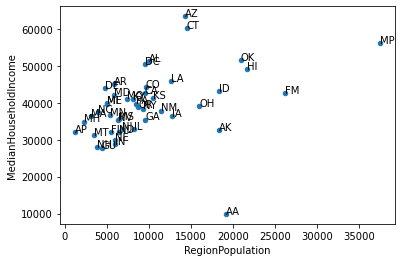

In [31]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
dfGrouped=dfMerged.groupby(by=["state"]).mean()
dfGrouped.plot('RegionPopulation', 'MedianHouseholdIncome', kind='scatter', ax=ax)
for k, v in dfGrouped[['RegionPopulation', 'MedianHouseholdIncome']].iterrows():
    ax.annotate(k, v)